Purpose:

Predict the price of a house based on its characteristics

In [1]:
### Data Preprocessing
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

dataframe = pd.read_csv("housing.csv")

# Separate the Data
features = dataframe.drop(["median_house_value", "total_bedrooms"], axis = 1) # I removed total_bedrooms because it has NaN
label = dataframe["median_house_value"]
features

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,2401,1138,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,496,177,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,558,219,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,565,259,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,845,330,1.5603,INLAND
20636,-121.21,39.49,18,697,356,114,2.5568,INLAND
20637,-121.22,39.43,17,2254,1007,433,1.7000,INLAND
20638,-121.32,39.43,18,1860,741,349,1.8672,INLAND


In [2]:
# Change ocean_proximity column to 4 different columns
# 0 => <1OCEAN
# 1 => NEAR OCEAN
# 2 => INLAND
# 3 => ISLAND
# 4 => NEAR BAY

for i in range(len(features["ocean_proximity"])):
  column_name = features["ocean_proximity"][i]

  if column_name == "NEAR BAY": features.loc[i, "NEAR_BAY"] = 1 
  else: features.loc[i, "NEAR_BAY"] = 0 
  
  if column_name == "NEAR OCEAN": features.loc[i, "NEAR_OCEAN"] = 1 
  else: features.loc[i, "NEAR_OCEAN"] = 0 
  
  if column_name == "INLAND": features.loc[i, "INLAND"] = 1 
  else: features.loc[i, "INLAND"] = 0 
  
  if column_name == "ISLAND": features.loc[i, "ISLAND"] = 1 
  else: features.loc[i, "ISLAND"] = 0 
  
  if column_name == "<1OCEAN": features.loc[i, "<1OCEAN"] = 1 
  else: features.loc[i, "<1OCEAN"] = 0 
  
features = features.drop( "ocean_proximity", axis = 1 )
features

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,NEAR_BAY,NEAR_OCEAN,INLAND,ISLAND,<1OCEAN
0,-122.23,37.88,41,880,322,126,8.3252,1.0,0.0,0.0,0.0,0.0
1,-122.22,37.86,21,7099,2401,1138,8.3014,1.0,0.0,0.0,0.0,0.0
2,-122.24,37.85,52,1467,496,177,7.2574,1.0,0.0,0.0,0.0,0.0
3,-122.25,37.85,52,1274,558,219,5.6431,1.0,0.0,0.0,0.0,0.0
4,-122.25,37.85,52,1627,565,259,3.8462,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,845,330,1.5603,0.0,0.0,1.0,0.0,0.0
20636,-121.21,39.49,18,697,356,114,2.5568,0.0,0.0,1.0,0.0,0.0
20637,-121.22,39.43,17,2254,1007,433,1.7000,0.0,0.0,1.0,0.0,0.0
20638,-121.32,39.43,18,1860,741,349,1.8672,0.0,0.0,1.0,0.0,0.0


In [3]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features.values, label.values, test_size = 0.25)

# Apply feature scaling
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform( X_train )
X_test = feature_scaler.transform( X_test )

print(len(X_train), len(y_train), len(X_test), len(y_test))

15480 15480 5160 5160


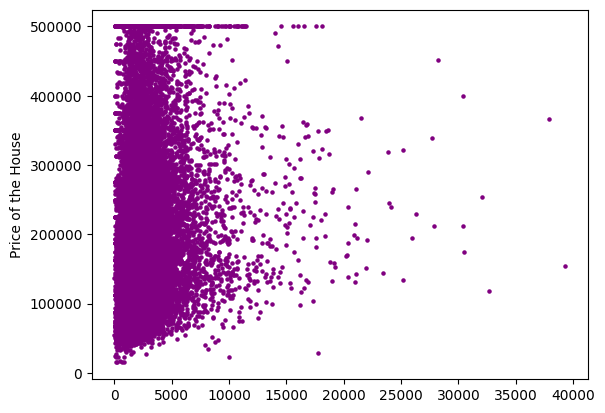

In [8]:
### Visualize the Data
plt.scatter(features["total_rooms"].values, label.values, s = 5, c = "purple")
plt.ylabel("Price of the House")
plt.show()

In [9]:
### Build Multiple Linear Regressor
from sklearn.linear_model import LinearRegression
multiple_regressor = LinearRegression()
multiple_regressor.fit( X_train, y_train )
MR_prediction = multiple_regressor.predict( X_test )
MR_score = r2_score(y_test, MR_prediction)
MR_score

0.6419263671062739

In [10]:
### Build Polynomial Linear Regressor
from sklearn.preprocessing import PolynomialFeatures
polynomial_features_creator = PolynomialFeatures( degree = 3 )
polynomial_regressor = LinearRegression()
polynomial_regressor.fit( polynomial_features_creator.fit_transform(X_train), y_train )
PR_prediction = polynomial_regressor.predict( polynomial_features_creator.fit_transform(X_test) )

PR_score = r2_score( y_test, PR_prediction )
PR_score 

0.7171369553076146

In [11]:
### Build Non-Linear Support Vector Regressor
from sklearn.svm import SVR
svr = SVR( kernel = "rbf")
svr.fit( X_train, y_train )
SVR_prediction = svr.predict( X_test )
SVR_score = r2_score(y_test, SVR_prediction)
SVR_score

-0.060833627785740196

In [12]:
### Build Decision Tree
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit( X_train, y_train )
tree_prediction = tree.predict( X_test )
tree_score = r2_score(y_test, tree_prediction)
tree_score 

0.6404189108844214

In [13]:
### Build Random Forest
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( n_estimators = 100)
forest.fit( X_train, y_train )
forest_prediction = forest.predict( X_test )
forest_score = r2_score(y_test, forest_prediction)
forest_score 

0.8086037382720723

In [14]:
### Evaluate Models
print(f"Multiple Linear Regression Score: {MR_score}")
print(f"Polynomial Regression Score: {PR_score}")
print(f"Support Vector Regression Score: {SVR_score}")
print(f"Decision Tree Regression Score: {tree_score}")
print(f"Random Forest Regression Score: {forest_score}")

Multiple Linear Regression Score: 0.6419263671062739
Polynomial Regression Score: 0.7171369553076146
Support Vector Regression Score: -0.060833627785740196
Decision Tree Regression Score: 0.6404189108844214
Random Forest Regression Score: 0.8086037382720723
